In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_backup=pd.read_csv('3.1 loan_data_2007_2014.csv')

D:\Annaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan_data=loan_data_backup.copy()

## Exploring Data

In [4]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [5]:
#In order to view all the columns in the dataset
pd.options.display.max_columns=None
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [6]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [8]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# General Preprocessing

### Preprocessing few continuous variables

In [10]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
loan_data['emp_length_int']=loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace(' year','')

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])

In [14]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [15]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [16]:
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')

In [17]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [19]:
loan_data['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [20]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [22]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-22-79c269275a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()


In [23]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [24]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [25]:
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [26]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [27]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [28]:
type(loan_data['term_int'][25])

str

In [29]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [30]:
type(loan_data['term_int'][0])

numpy.int64

In [31]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [32]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## Preprocessing of discrete variable

In [33]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [34]:
pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [35]:
loan_data_dummies=[pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                  pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                  pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                  pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                  pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                  pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                  pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                  pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':'),]

In [36]:
loan_data_dummies=pd.concat(loan_data_dummies,axis=1)

In [37]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [38]:
loan_data=pd.concat([loan_data,loan_data_dummies],axis=1)

In [39]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

## Checking for missing values and clean

In [40]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [41]:
pd.options.display.max_rows=None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [42]:
pd.options.display.max_rows=100

In [43]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True)

In [44]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [45]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [46]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# PD Model

## Data Preperation

### Dependent Variable. Good/Bad (Default) Definition. Default and Non-Default Accounts

In [47]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [48]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [49]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [50]:
loan_data['good_bad']=np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                             'Does not meet the credit policy. Status:Charged Off',
                                                             'Late (31-120 days)']),0,1)

In [51]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

### Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 99170        99170   6729721    8332030      10000        10000   
 82834        82834   7637007    9319054      12000        12000   
 116628      116628   6168178    7650318       5600         5600   
 72033        72033   8306309   10048368      24925        24925   
 294933      294933  29023818   31547015      20000        20000   
 ...            ...       ...        ...        ...          ...   
 287550      287550  30044923   32568095       9000         9000   
 377815      377815  17754867   19887354      10500        10500   
 115664      115664   5646869    7029132      25000        25000   
 350126      350126  20741732   23014190      11000        11000   
 370495      370495  16511920   18644407       4000         4000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 99170           10000.0   36 months     13.68       340.23     C        C1   
 82834           11950.0

In [54]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test=train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'])

In [55]:
loan_data_inputs_train.shape

(349713, 207)

In [56]:
loan_data_inputs_test.shape

(116572, 207)

In [57]:
loan_data_targets_train.shape

(349713,)

In [58]:
loan_data_targets_test.shape

(116572,)

In [59]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test=train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],test_size=0.2,random_state=42)

In [60]:
loan_data_inputs_train.shape

(373028, 207)

In [61]:
loan_data_inputs_test.shape

(93257, 207)

In [62]:
loan_data_targets_train.shape

(373028,)

In [63]:
loan_data_targets_test.shape

(93257,)

## Data Preparation: An Example

In [173]:
# df_inputs_prepr=loan_data_inputs_train
# df_targets_prepr=loan_data_targets_train
df_inputs_prepr=loan_data_inputs_test
df_targets_prepr=loan_data_targets_test

In [174]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [175]:
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [176]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [177]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962338
1,B,0.923085
2,C,0.882905
3,D,0.844314
4,E,0.805178
5,F,0.775472
6,G,0.697605


In [178]:
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
              df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [179]:
df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962338
1,B,27199,B,0.923085
2,C,25048,C,0.882905
3,D,15390,D,0.844314
4,E,7145,E,0.805178
5,F,2699,F,0.775472
6,G,668,G,0.697605


In [180]:
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [181]:
df1.columns=[df1.columns.values[0],'n_obs','prop_good']
df1

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [182]:
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [183]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.962338,0.162004
1,B,27199,0.923085,0.291656
2,C,25048,0.882905,0.268591
3,D,15390,0.844314,0.165028
4,E,7145,0.805178,0.076616
5,F,2699,0.775472,0.028942
6,G,668,0.697605,0.007163


In [184]:
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0
1,B,27199,0.923085,0.291656,25107.0,2092.0
2,C,25048,0.882905,0.268591,22115.0,2933.0
3,D,15390,0.844314,0.165028,12994.0,2396.0
4,E,7145,0.805178,0.076616,5753.0,1392.0
5,F,2699,0.775472,0.028942,2093.0,606.0
6,G,668,0.697605,0.007163,466.0,202.0


In [185]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823


In [186]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323


In [187]:
df1=df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469


In [188]:
df1['diff_prop_good']=df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683


In [189]:
df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


### Preprocessing Discrete Variables: Automating Calculations

In [190]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
              df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]]
    df.columns=[df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df=df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good']=df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [191]:
df_temp=woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


### Preprocessing Discrete Variables: Visualizing Results

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [193]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weights of Evidence')
    plt.title(str('Weight of Evidence by '+df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

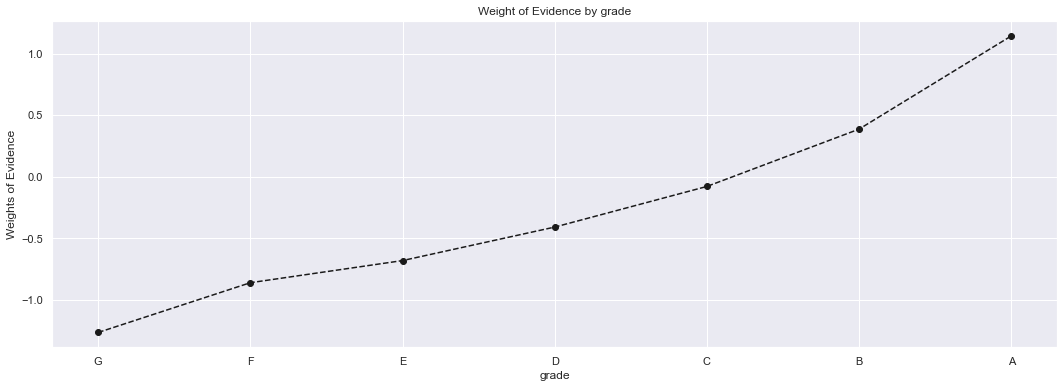

In [194]:
plot_by_woe(df_temp)

### Preprocessing Discret Variables: Creating Dummy Variables, Part 1

In [195]:
df_temp=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


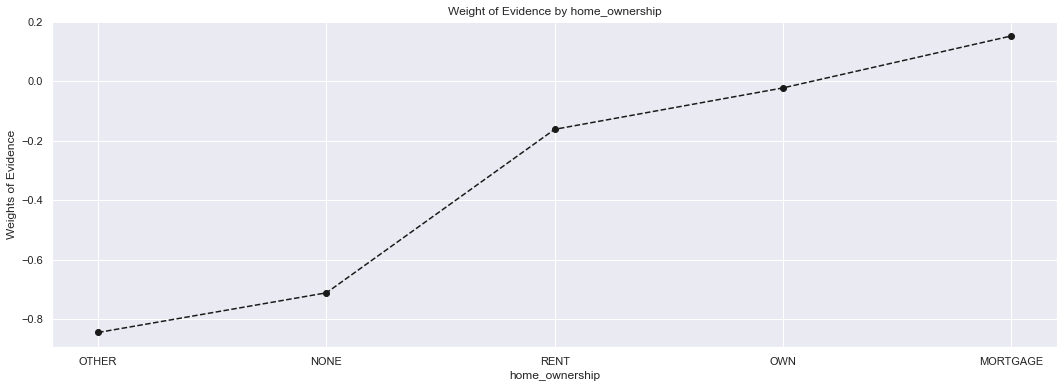

In [196]:
plot_by_woe(df_temp)

In [197]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr[ 'home_ownership:OTHER'],
                                                          df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr[ 'home_ownership:ANY']])

### Preprocessing Discret Variables: Creating Dummy Variables, Part 2

In [198]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [199]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


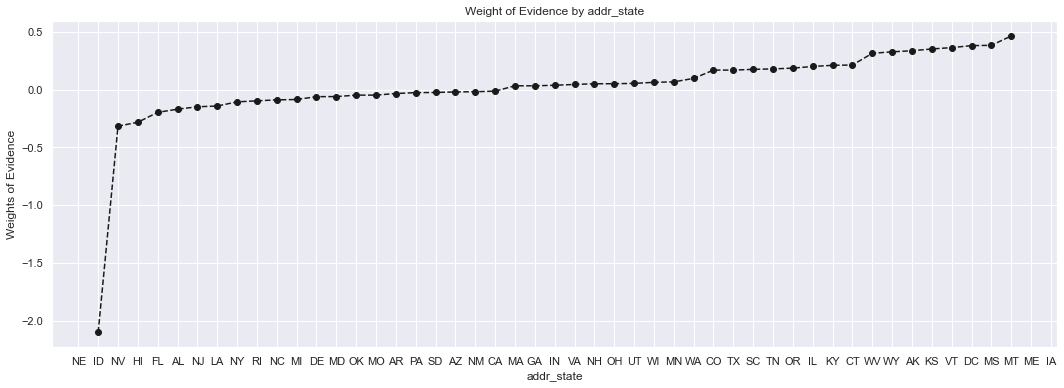

In [200]:
plot_by_woe(df_temp)

In [201]:
 if['addr_state:ND'] in df_inputs_prepr.columns.values:
        pass
else:
    df_inputs_prepr['addr_state:ND']=0

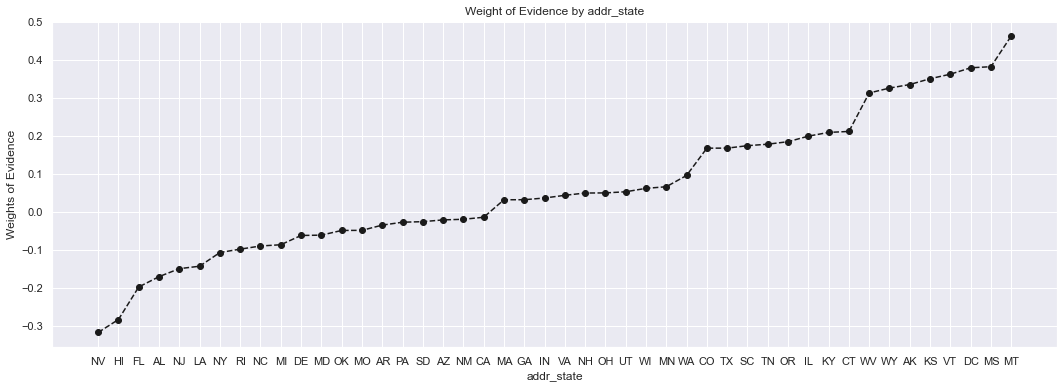

In [202]:
plot_by_woe(df_temp.iloc[2:-2,:])

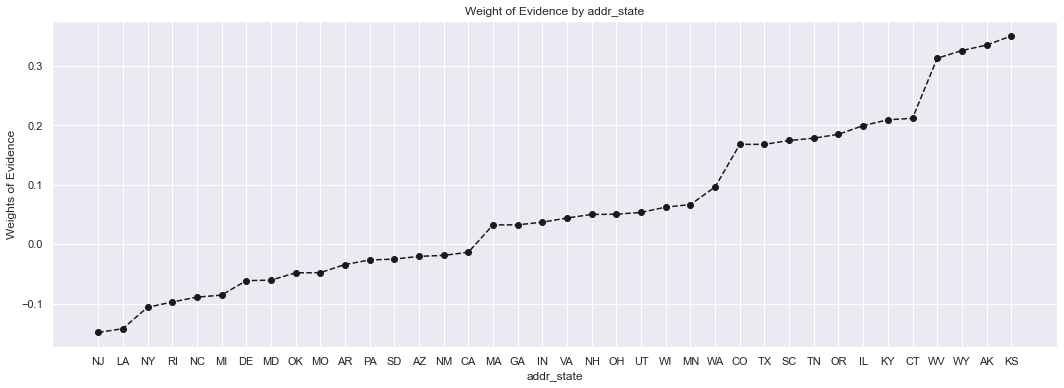

In [203]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [204]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [205]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,NaN,NaN,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.023707,0.231704,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.011152,0.125494,0.022684


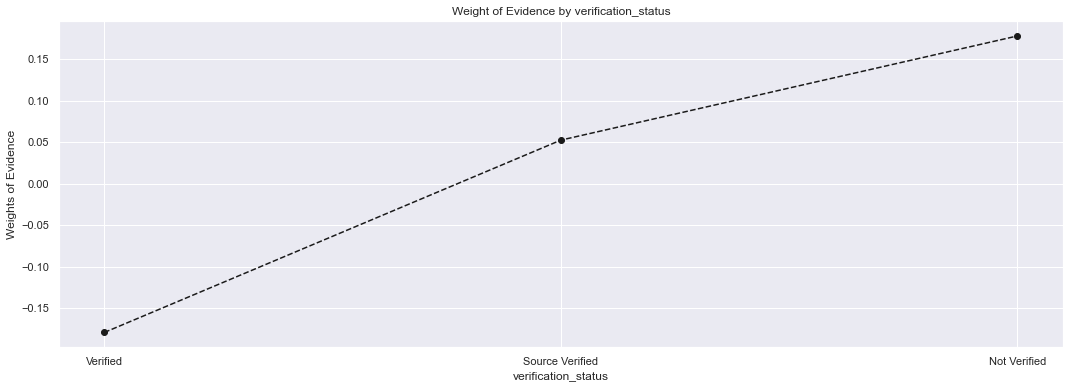

In [206]:
plot_by_woe(df_temp)

In [207]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

In [208]:
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,NaN,NaN,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.018620,0.102745,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.005650,0.032329,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.080220,0.544307,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.001471,0.012080,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.002237,0.018569,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.003028,0.025537,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.014702,0.131312,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.002311,0.021867,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.004867,0.047289,0.045124


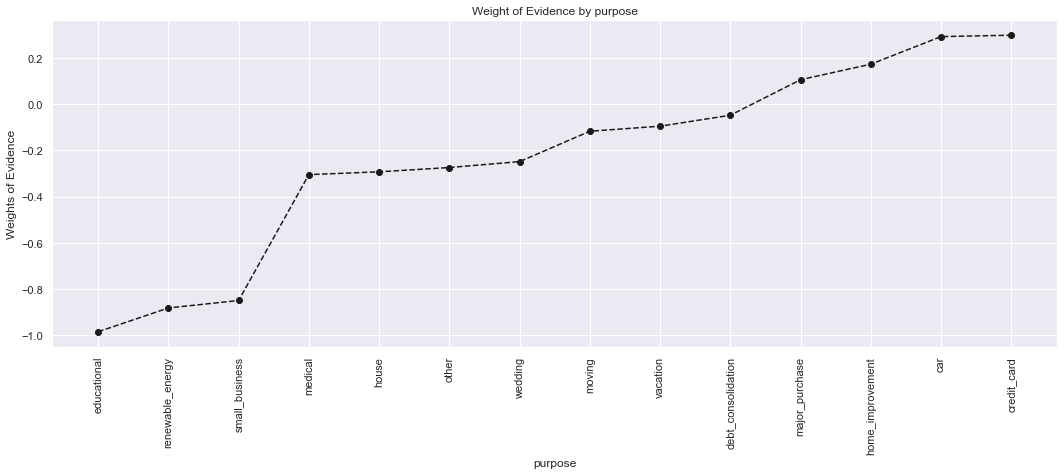

In [209]:
plot_by_woe(df_temp, 90)

In [210]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [211]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.71423,-0.108794,NaN,NaN,0.024888
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.28577,0.229238,0.031443,0.338032,0.024888


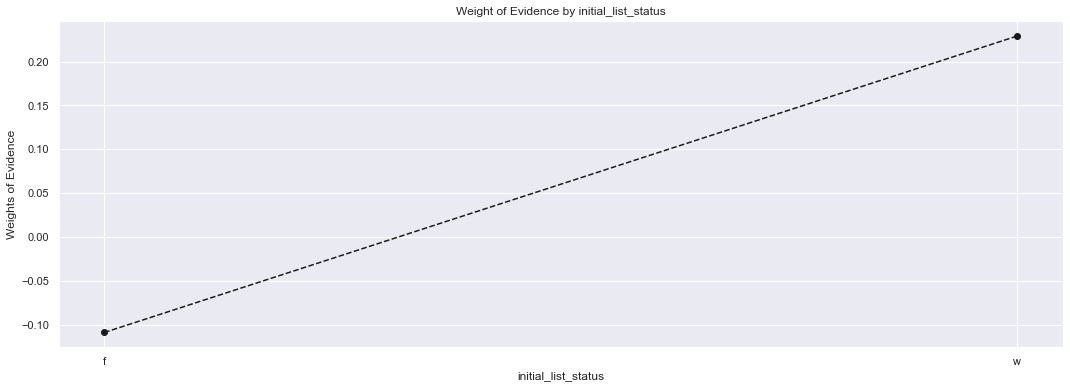

In [212]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables:Automating Calculation and Visualizing Result

In [213]:
def woe_ordered_continuous(df,discrete_variable_name,good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
              df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]]
    df.columns=[df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
#     df=df.sort_values(['WoE'])
#     df=df.reset_index(drop=True)
    df['diff_prop_good']=df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [214]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [215]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


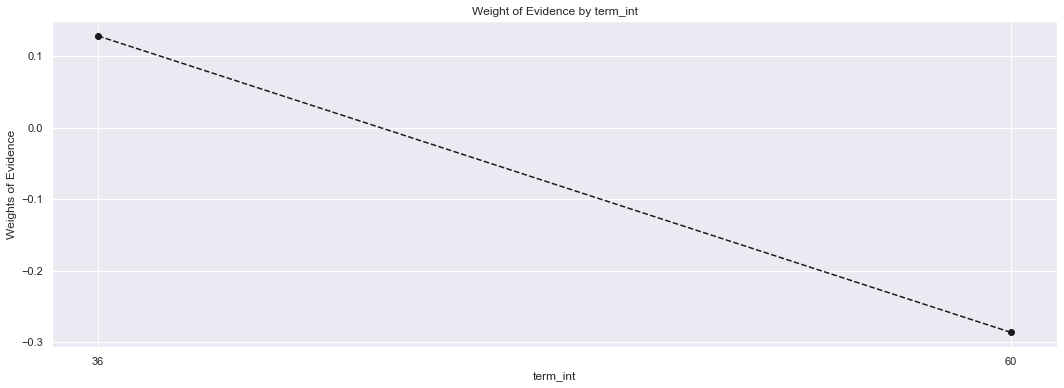

In [216]:
plot_by_woe(df_temp)

In [217]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [218]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [219]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,NaN,NaN,0.007766
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.018102,0.176245,0.007766
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.005192,0.053039,0.007766
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.001923,0.019389,0.007766
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.000144,0.001465,0.007766
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.003208,0.032228,0.007766
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007409,0.071500,0.007766
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.014736,0.146326,0.007766
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.003451,0.035790,0.007766
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.002711,0.028024,0.007766


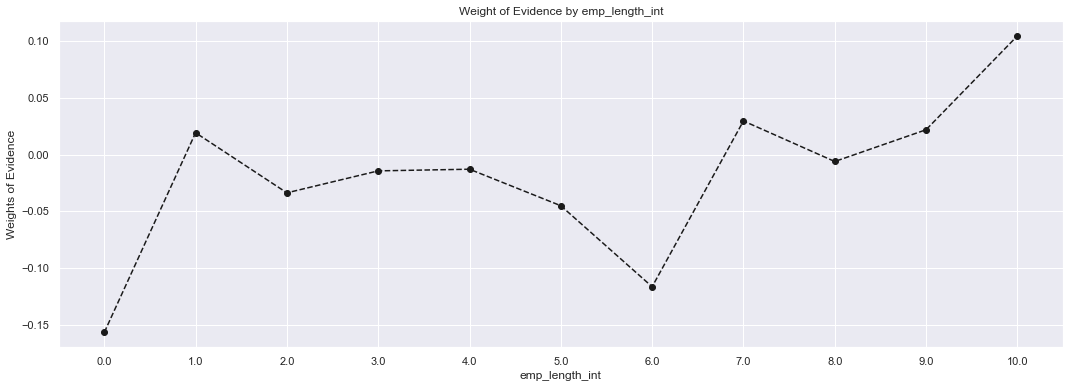

In [220]:
plot_by_woe(df_temp)

In [221]:
df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [222]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [223]:
df_inputs_prepr['mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mths_since_issue_d'],50)

In [224]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [225]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'mths_since_issue_d_factor',df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,NaN,NaN,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.015392,0.266241,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.010428,0.150833,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.010829,0.138715,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.006248,0.073381,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.007572,0.083487,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.005027,0.052525,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.004339,0.043669,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.007022,0.067693,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.004770,0.044080,0.126297


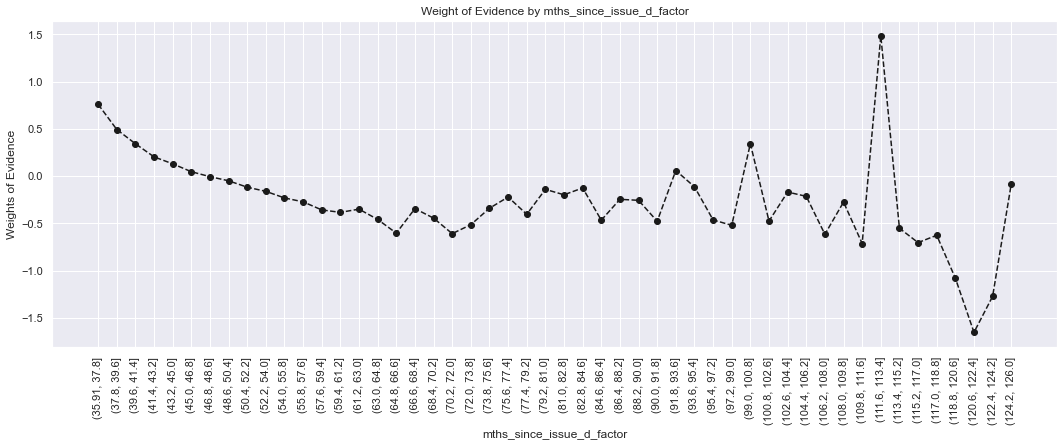

In [226]:
plot_by_woe(df_temp,90)

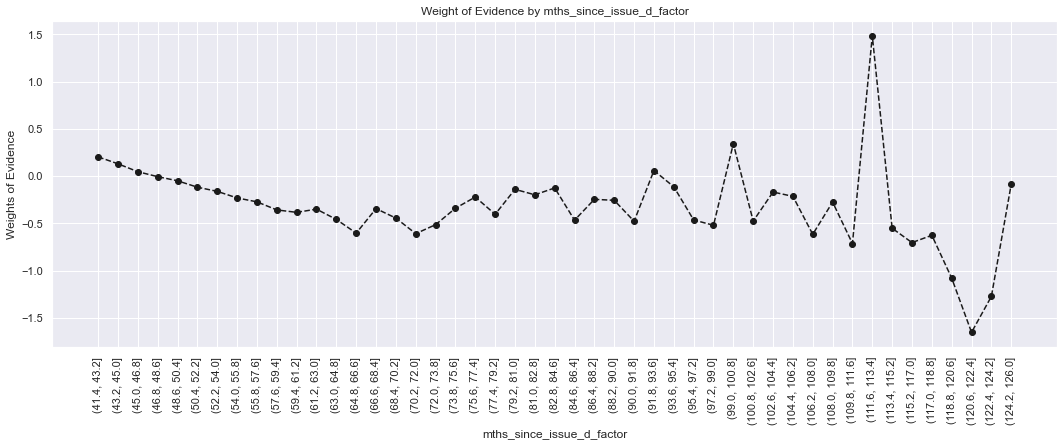

In [227]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [228]:
df_inputs_prepr['mths_since_issue_d:<38']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issue_d:38-39']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issue_d:40-41']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issue_d:42-48']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issue_d:49-52']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issue_d:53-64']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issue_d:65-84']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issue_d:>84']=np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(84,int(df_inputs_prepr['mths_since_issue_d'].max()))),1,0)

In [229]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [230]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


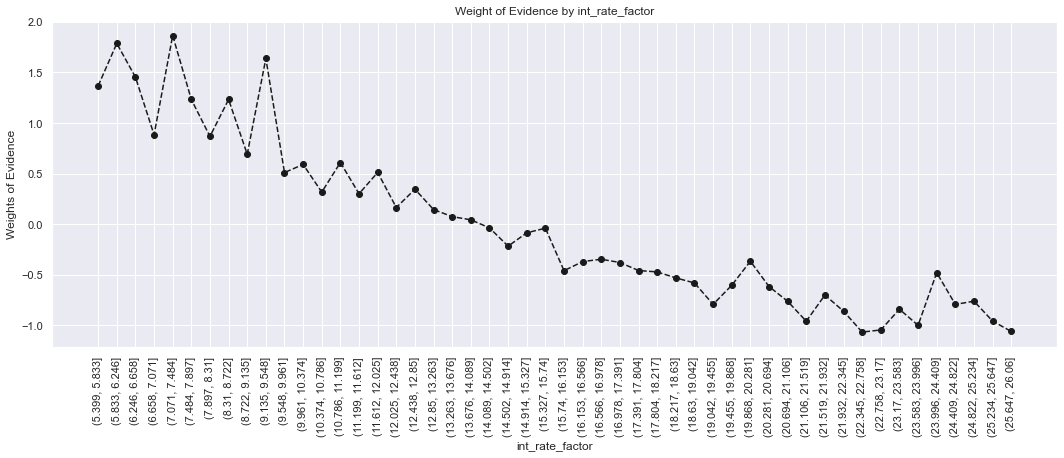

In [231]:
plot_by_woe(df_temp,90)

In [232]:
df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<=9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:>20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)

In [233]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


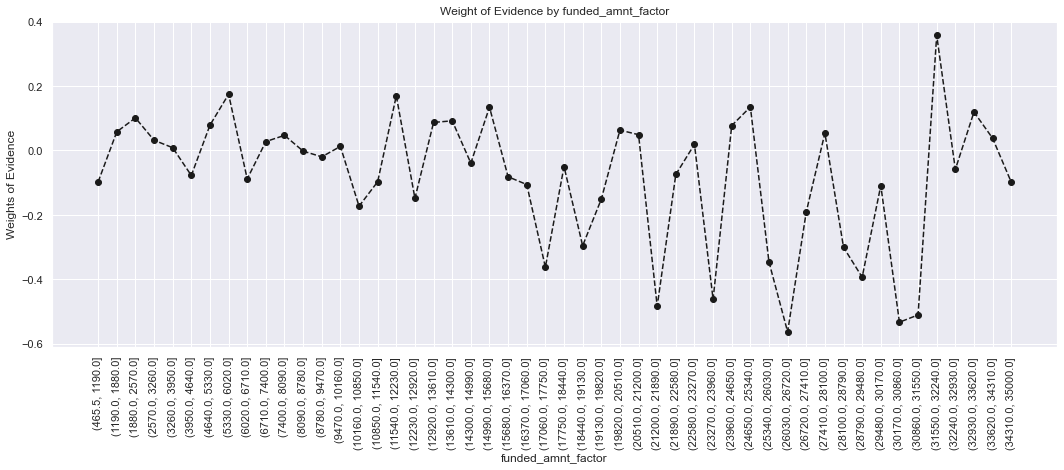

In [234]:
plot_by_woe(df_temp,90)

In [235]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",182,0.923077,0.001952,168.0,14.0,0.002022,0.001374,0.386666,NaN,NaN,inf
7,"(82.18, 93.92]",508,0.913386,0.005447,464.0,44.0,0.005586,0.004318,0.257454,0.009691,0.129212,inf
8,"(93.92, 105.66]",715,0.851748,0.007667,609.0,106.0,0.007331,0.010402,-0.349861,0.061638,0.607316,inf
9,"(105.66, 117.4]",1268,0.854890,0.013597,1084.0,184.0,0.013050,0.018057,-0.324763,0.003141,0.025098,inf


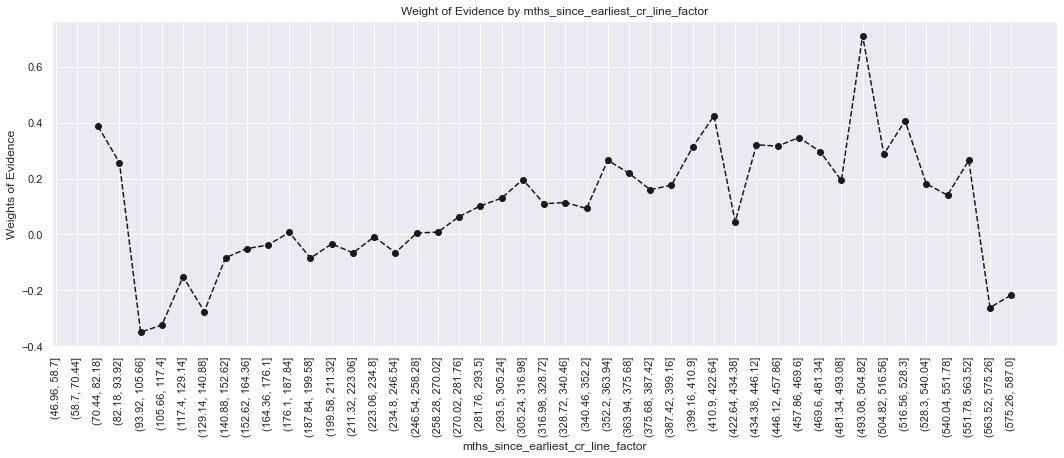

In [236]:
plot_by_woe(df_temp, 90)

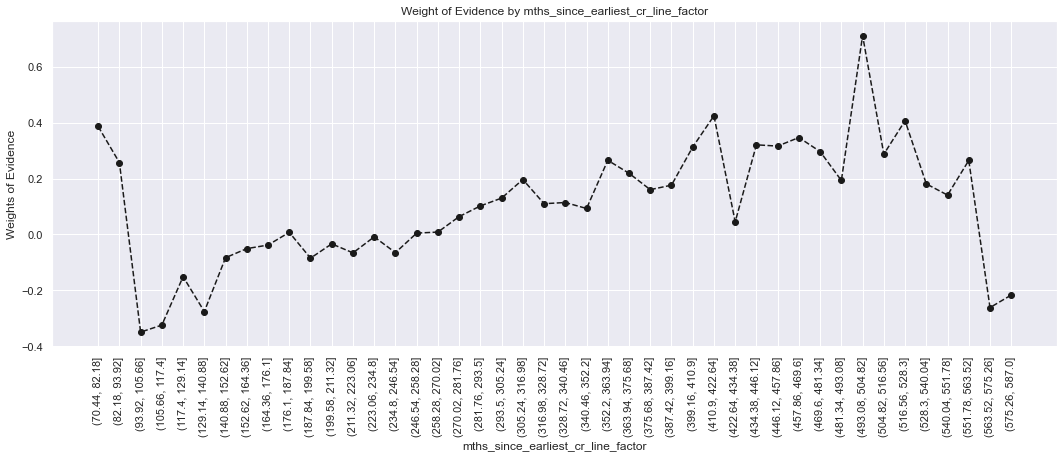

In [237]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [238]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [239]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76566,0.890944,0.821021,68216.0,8350.0,0.821217,0.819431,0.002177,NaN,NaN,inf
1,1.0,11297,0.890413,0.121138,10059.0,1238.0,0.121095,0.121492,-0.003270,0.000530,0.005447,inf
2,2.0,3192,0.885025,0.034228,2825.0,367.0,0.034009,0.036016,-0.057339,0.005388,0.054069,inf
3,3.0,1134,0.893298,0.012160,1013.0,121.0,0.012195,0.011874,0.026640,0.008273,0.083979,inf
4,4.0,510,0.886275,0.005469,452.0,58.0,0.005441,0.005692,-0.045001,0.007024,0.071642,inf
5,5.0,270,0.911111,0.002895,246.0,24.0,0.002961,0.002355,0.229037,0.024837,0.274039,inf
6,6.0,128,0.859375,0.001373,110.0,18.0,0.001324,0.001766,-0.288132,0.051736,0.517169,inf
7,7.0,67,0.925373,0.000718,62.0,5.0,0.000746,0.000491,0.419456,0.065998,0.707588,inf
8,8.0,29,0.896552,0.000311,26.0,3.0,0.000313,0.000294,0.061244,0.028821,0.358212,inf
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000253,0.000098,0.946282,0.057994,0.885038,inf


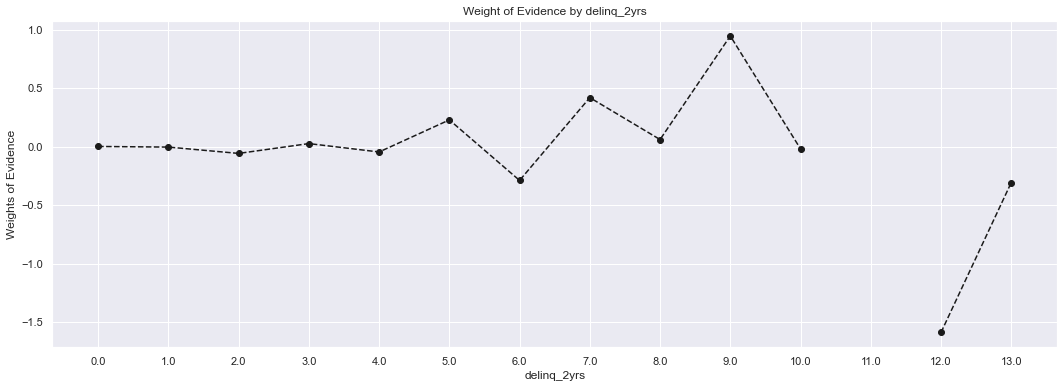

In [240]:
plot_by_woe(df_temp)

In [241]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [242]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.910094,0.517870,43953.0,4342.0,0.529127,0.426104,0.216545,NaN,NaN,inf
1,1.0,25985,0.882394,0.278639,22929.0,3056.0,0.276030,0.299902,-0.082945,0.027701,0.299490,inf
2,2.0,11611,0.861252,0.124505,10000.0,1611.0,0.120385,0.158096,-0.272511,0.021141,0.189566,inf
3,3.0,5086,0.846245,0.054537,4304.0,782.0,0.051814,0.076742,-0.392795,0.015008,0.120285,inf
4,4.0,1431,0.841370,0.015345,1204.0,227.0,0.014494,0.022277,-0.429786,0.004875,0.036991,inf
5,5.0,551,0.842105,0.005908,464.0,87.0,0.005586,0.008538,-0.424264,0.000736,0.005522,inf
6,6.0,211,0.763033,0.002263,161.0,50.0,0.001938,0.004907,-0.928859,0.079072,0.504595,inf
7,7.0,36,0.527778,0.000386,19.0,17.0,0.000229,0.001668,-1.987015,0.235255,1.058156,inf
8,8.0,21,0.523810,0.000225,11.0,10.0,0.000132,0.000981,-2.002930,0.003968,0.015915,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000036,0.000393,-2.385923,0.095238,0.382992,inf


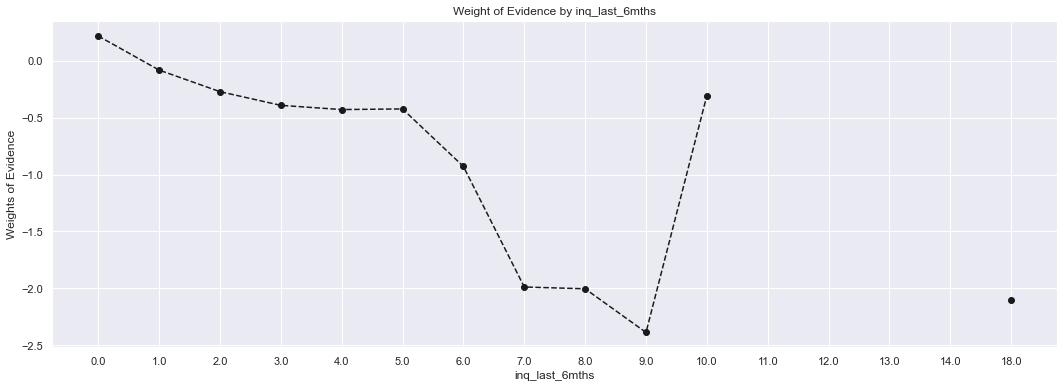

In [243]:
plot_by_woe(df_temp)

In [244]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [245]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,NaN,NaN,inf
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000337,0.000393,-0.152331,0.125000,inf,inf
2,2.0,334,0.838323,0.003582,280.0,54.0,0.003371,0.005299,-0.452435,0.036677,0.300105,inf
3,3.0,1122,0.852941,0.012031,957.0,165.0,0.011521,0.016192,-0.340383,0.014618,0.112052,inf
4,4.0,2560,0.892188,0.027451,2284.0,276.0,0.027496,0.027085,0.015042,0.039246,0.355425,inf
5,5.0,4403,0.891438,0.047214,3925.0,478.0,0.047251,0.046909,0.007270,0.000750,0.007772,inf
6,6.0,6216,0.890766,0.066655,5537.0,679.0,0.066657,0.066634,0.000346,0.000672,0.006924,inf
7,7.0,7433,0.886856,0.079704,6592.0,841.0,0.079358,0.082532,-0.039220,0.003910,0.039567,inf
8,8.0,8314,0.893433,0.089151,7428.0,886.0,0.089422,0.086948,0.028054,0.006577,0.067275,inf
9,9.0,8768,0.888230,0.094020,7788.0,980.0,0.093756,0.096173,-0.025454,0.005203,0.053508,inf


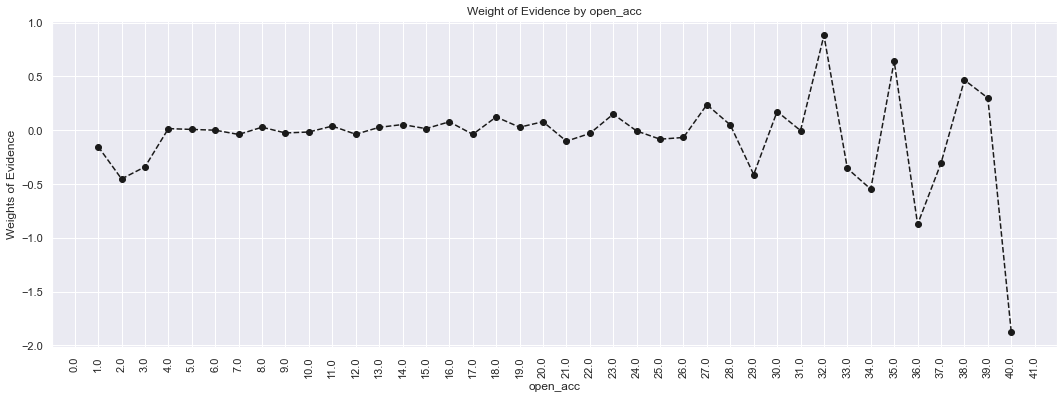

In [246]:
plot_by_woe(df_temp, 90)

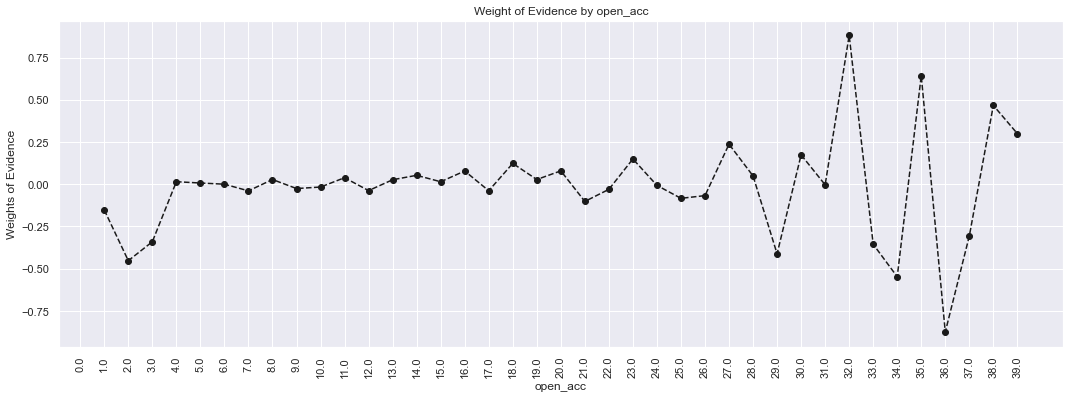

In [247]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [248]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [249]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.889179,0.867742,71955.0,8968.0,0.866228,0.880079,-0.015862,NaN,NaN,inf
1,1.0,10670,0.901125,0.114415,9615.0,1055.0,0.115750,0.103533,0.111543,0.011946,0.127405,inf
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011942,0.010304,0.147522,0.003160,0.035979,inf
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003587,0.003238,0.102345,0.003982,0.045177,inf
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001156,0.001570,-0.306481,0.043159,0.408826,inf
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000795,0.000687,0.145504,0.046967,0.451985,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000205,0.000196,0.041825,0.009373,0.103678,inf
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000294,-0.798958,0.109023,0.840783,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000098,-0.711946,0.014286,0.087011,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.200000,inf,inf


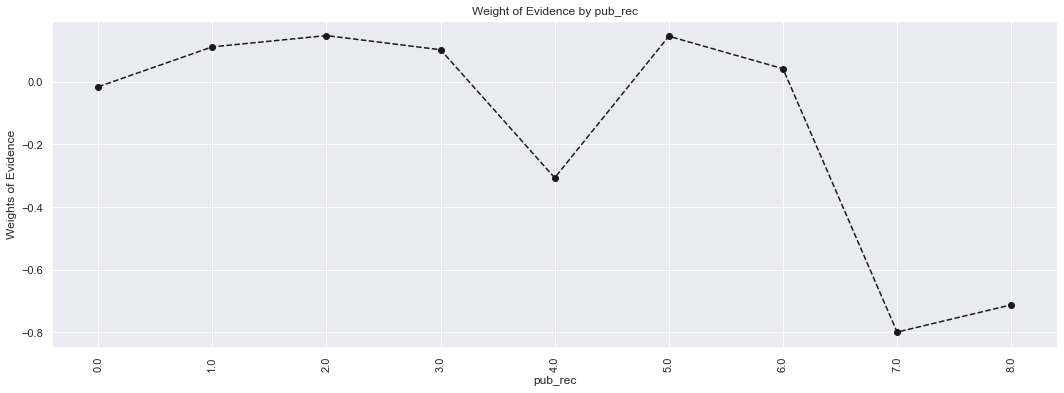

In [250]:
plot_by_woe(df_temp, 90)

In [251]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [252]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.776000,0.001340,97.0,28.0,0.001168,0.002748,-0.855734,NaN,NaN,inf
1,"(3.12, 6.24]",1499,0.850567,0.016074,1275.0,224.0,0.015349,0.021982,-0.359185,0.074567,0.496549,inf
2,"(6.24, 9.36]",3715,0.871871,0.039836,3239.0,476.0,0.038993,0.046712,-0.180639,0.021304,0.178547,inf
3,"(9.36, 12.48]",6288,0.874841,0.067427,5501.0,787.0,0.066224,0.077233,-0.153784,0.002970,0.026855,inf
4,"(12.48, 15.6]",8289,0.888286,0.088883,7363.0,926.0,0.088639,0.090873,-0.024892,0.013445,0.128892,inf
5,"(15.6, 18.72]",9843,0.890176,0.105547,8762.0,1081.0,0.105481,0.106084,-0.005703,0.001890,0.019189,inf
6,"(18.72, 21.84]",10270,0.893866,0.110126,9180.0,1090.0,0.110513,0.106968,0.032609,0.003690,0.038312,inf
7,"(21.84, 24.96]",9971,0.892789,0.106920,8902.0,1069.0,0.107167,0.104907,0.021312,0.001077,0.011297,inf
8,"(24.96, 28.08]",11873,0.892108,0.127315,10592.0,1281.0,0.127512,0.125711,0.014217,0.000681,0.007094,inf
9,"(28.08, 31.2]",7289,0.892715,0.078160,6507.0,782.0,0.078334,0.076742,0.020538,0.000607,0.006321,inf


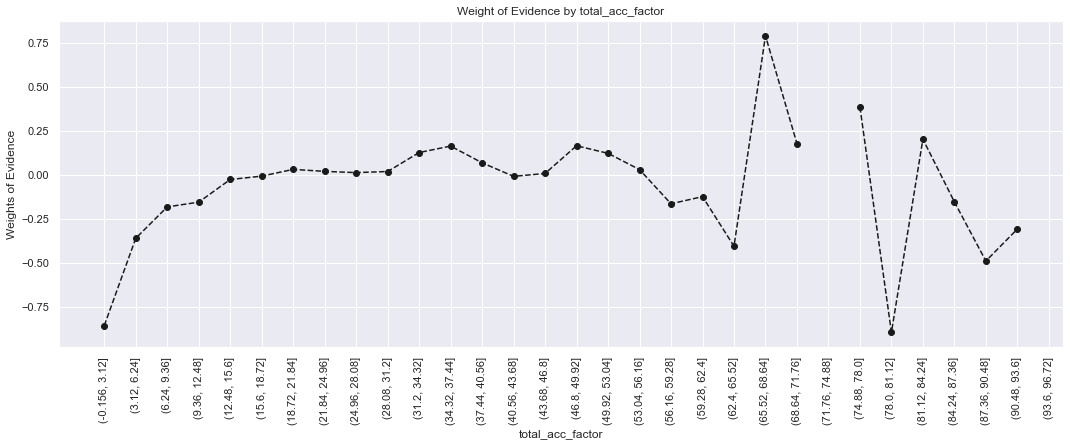

In [253]:
plot_by_woe(df_temp, 90)

In [254]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [255]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.890827,0.995861,82732.0,10139.0,0.995967,0.994995,0.000976,NaN,NaN,0.000298
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003780,0.004514,-0.177489,0.018605,0.178466,0.000298
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000217,0.000393,-0.594163,0.054040,0.416674,0.000298
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000098,-0.999628,0.068182,0.405465,0.000298


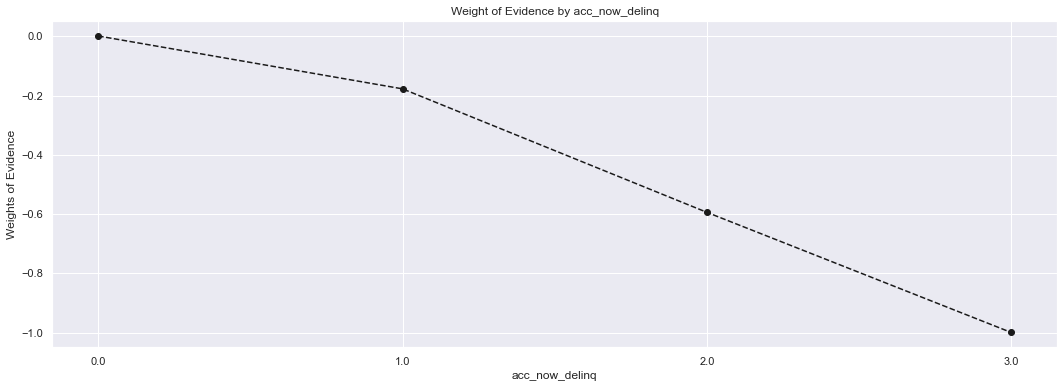

In [256]:
plot_by_woe(df_temp)

In [257]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [258]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2013.133, 1006.566]",238,0.840336,0.002552,200.0,38.0,0.002408,0.003729,-0.437509,NaN,NaN,inf
1,"(1006.566, 2013.133]",678,0.827434,0.007270,561.0,117.0,0.006754,0.011482,-0.530694,0.012903,0.093184,inf
2,"(2013.133, 3019.7]",1121,0.852810,0.012021,956.0,165.0,0.011509,0.016192,-0.341428,0.025376,0.189265,inf
3,"(3019.7, 4026.266]",1461,0.878166,0.015666,1283.0,178.0,0.015445,0.017468,-0.123068,0.025356,0.218360,inf
4,"(4026.266, 5032.832]",2163,0.867776,0.023194,1877.0,286.0,0.022596,0.028067,-0.216802,0.010389,0.093735,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(2008100.168, 2009106.734]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(2009106.734, 2010113.301]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(2010113.301, 2011119.867]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(2011119.867, 2012126.434]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


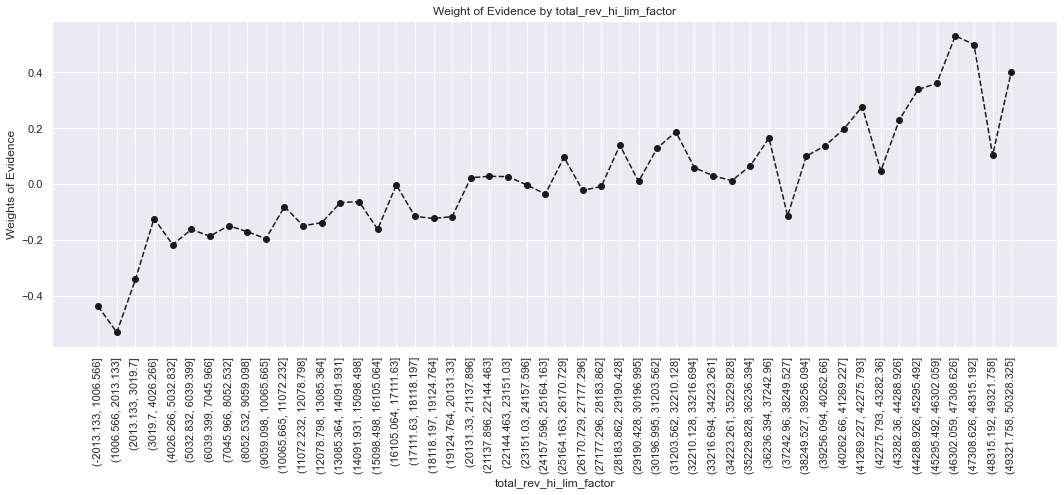

In [259]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [260]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [261]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.872165,0.005201,423.0,62.0,0.005092,0.006084,-0.178003,NaN,NaN,inf
1,"(43.585, 71.41]",1246,0.904494,0.013361,1127.0,119.0,0.013567,0.011678,0.149950,0.032329,0.327953,inf
2,"(71.41, 99.235]",1731,0.895436,0.018562,1550.0,181.0,0.018660,0.017763,0.049273,0.009058,0.100678,inf
3,"(99.235, 127.06]",2292,0.896597,0.024577,2055.0,237.0,0.024739,0.023258,0.061730,0.001161,0.012458,inf
4,"(127.06, 154.885]",2602,0.886241,0.027901,2306.0,296.0,0.027761,0.029048,-0.045330,0.010356,0.107061,inf
5,"(154.885, 182.71]",4133,0.897653,0.044318,3710.0,423.0,0.044663,0.041511,0.073174,0.011412,0.118505,inf
6,"(182.71, 210.535]",4109,0.905086,0.044061,3719.0,390.0,0.044771,0.038273,0.156823,0.007433,0.083648,inf
7,"(210.535, 238.36]",3730,0.901877,0.039997,3364.0,366.0,0.040497,0.035918,0.120012,0.003210,0.036811,inf
8,"(238.36, 266.185]",4660,0.899785,0.049969,4193.0,467.0,0.050477,0.045829,0.096602,0.002091,0.023410,inf
9,"(266.185, 294.01]",4975,0.888844,0.053347,4422.0,553.0,0.053234,0.054269,-0.019251,0.010941,0.115853,inf


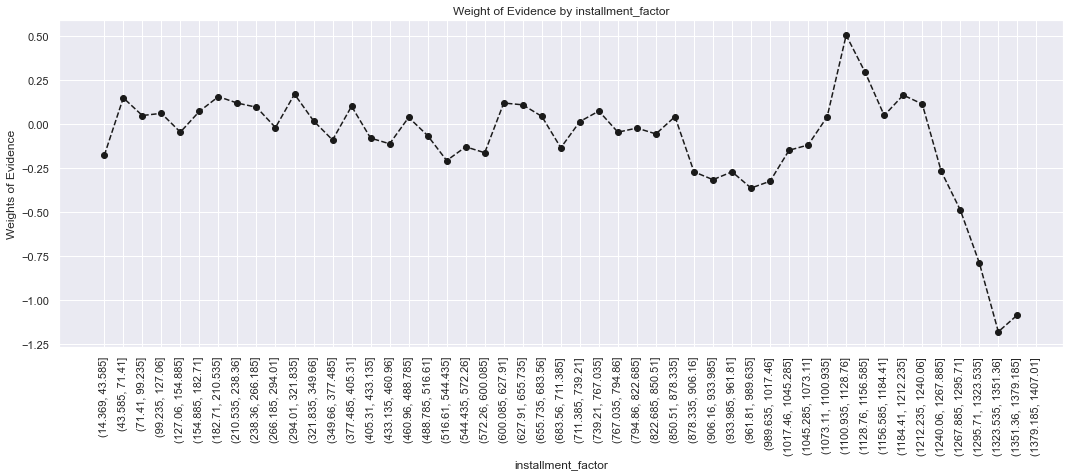

In [262]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [263]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 154704.0]",89203,0.889040,0.956529,79305.0,9898.0,0.954711,0.971344,-0.017272,NaN,NaN,inf
1,"(154704.0, 304608.0]",3626,0.926641,0.038882,3360.0,266.0,0.040449,0.026104,0.437959,0.037601,0.455231,inf
2,"(304608.0, 454512.0]",282,0.929078,0.003024,262.0,20.0,0.003154,0.001963,0.474372,0.002437,0.036412,inf
3,"(454512.0, 604416.0]",86,0.965116,0.000922,83.0,3.0,0.000999,0.000294,1.221988,0.036038,0.747616,inf
4,"(604416.0, 754320.0]",23,0.956522,0.000247,22.0,1.0,0.000265,0.000098,0.992802,0.008595,0.229186,inf
5,"(754320.0, 904224.0]",18,0.944444,0.000193,17.0,1.0,0.000205,0.000098,0.734973,0.012077,0.257829,inf
6,"(904224.0, 1054128.0]",7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,0.055556,inf,inf
7,"(1054128.0, 1204032.0]",6,1.000000,0.000064,6.0,0.0,0.000072,0.000000,inf,0.000000,NaN,inf
8,"(1204032.0, 1353936.0]",2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
9,"(1353936.0, 1503840.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.500000,inf,inf


In [264]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

D:\Annaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,0.037273,0.405928,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,0.011063,0.151818,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,0.001900,0.028159,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,0.001656,0.025100,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,0.001897,0.028710,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,0.034336,0.683391,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,0.076923,inf,inf


In [265]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000,:]

In [266]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-266-df94ee9ed040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.002043,-0.911157,0.238095,inf,inf
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.002758,-0.805796,0.018583,0.105361,inf
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.004597,-0.324142,0.071486,0.481654,inf
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.006743,-0.505060,0.024297,0.180919,inf
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.011953,-0.413234,0.012706,0.091826,inf
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.011034,-0.366198,0.006209,0.047036,inf
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.025337,-0.250148,0.014474,0.116050,inf
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.020331,-0.314891,0.007928,0.064743,inf
9,"(29136.0, 31840.0]",2292,0.854276,0.026137,1958.0,334.0,0.025134,0.034123,-0.305769,0.001139,0.009122,inf


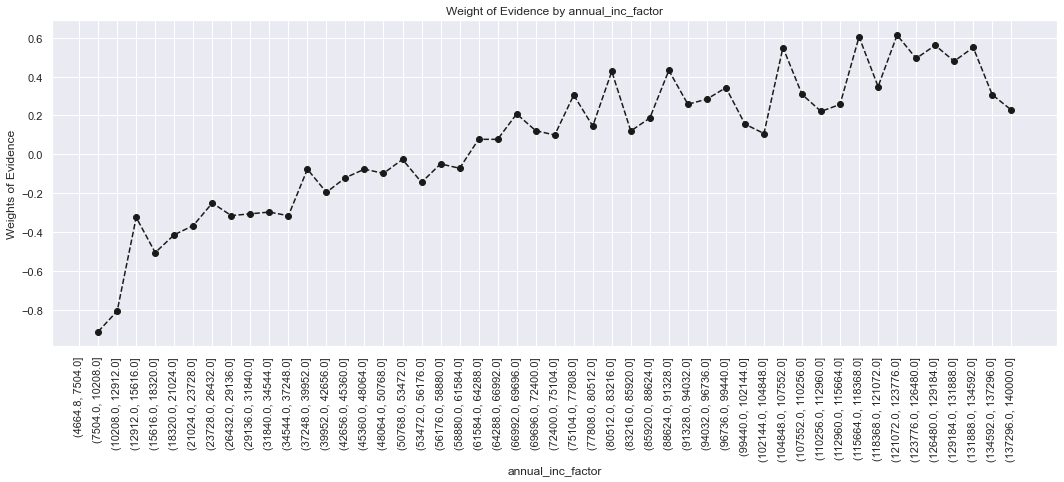

In [267]:
plot_by_woe(df_temp,90)

In [268]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [269]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [270]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


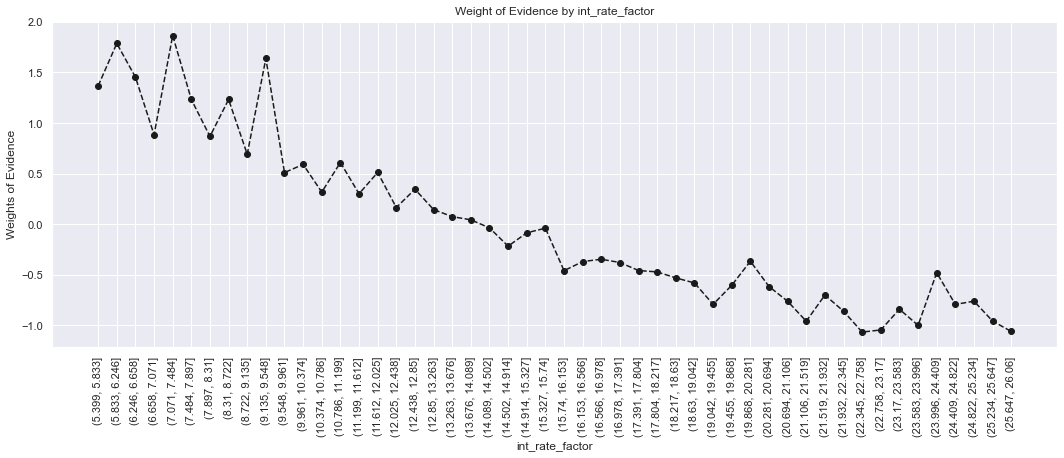

In [271]:
plot_by_woe(df_temp, 90)

In [272]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [273]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


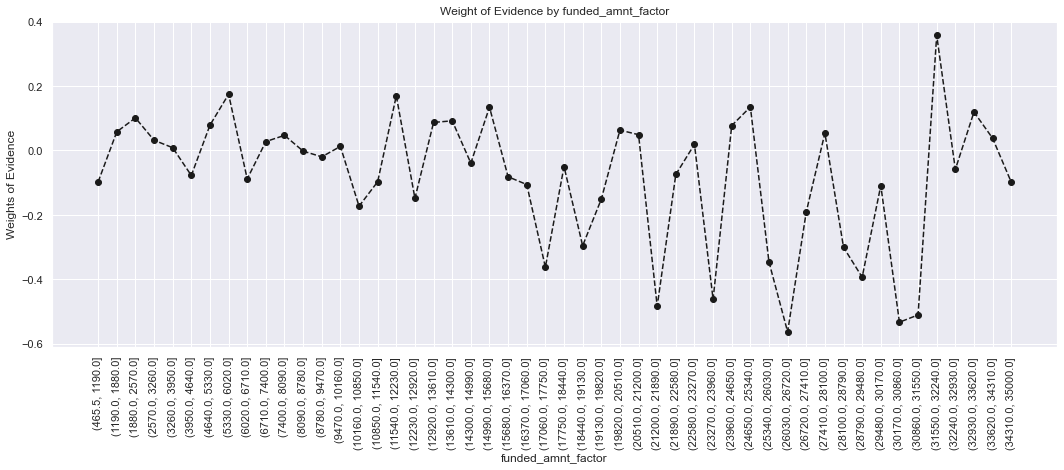

In [274]:
plot_by_woe(df_temp, 90)

## Preprocessing the Test Dataset

In [275]:
# loan_data_inputs_train=df_inputs_prepr
loan_data_inputs_test=df_inputs_prepr

In [276]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')